Platypus is a new Python library for multiobjective optimization and design exploration.  This tutorial will walk you through using Platypus to optimize the 3-objective DTLZ2 problem.  First, import the optimization algorithm NSGA-III and the problem definition for DTLZ2:

In [ ]:
!pip install platypus

In [1]:
from platypus.algorithms import NSGAIII
from platypus.problems import DTLZ2

Next, we create an instance of the 3-objective DTLZ2 problem:

In [2]:
problem = DTLZ2(3)

Then, create an instance of the NSGA-III optimization algorithm.  NSGA-III requires an additional argument called `divisions_outer`, which controls the number and spacing of reference points.  A larger value will produce more Pareto optimal points.  For 3-objective problems, 12 divisions works well.  Once initialized, run the algorithm for 10,000 function evaluations:

In [3]:
algorithm = NSGAIII(problem, divisions_outer=12)
algorithm.run(10000)

Once finished (it will take about one minute), we can inspect the results.  Below, we display the objectives for the first five solutions:

In [4]:
print " Obj1\t Obj2\t Obj3"

for solution in algorithm.result[:5]:
    print "%0.3f\t%0.3f\t%0.3f" % tuple(solution.objectives)

 Obj1	 Obj2	 Obj3
0.410	0.817	0.409
0.000	0.196	0.982
0.318	0.001	0.958
0.775	0.577	0.260
0.262	0.887	0.384


Alternatively, we can produce 3D plots to display the Pareto front.  Here, we use matplotlib to generate the 3D figure:

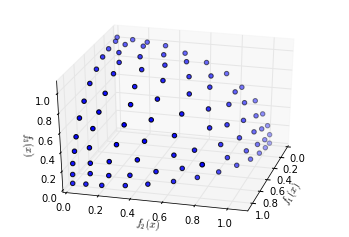

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([s.objectives[0] for s in algorithm.result],
           [s.objectives[1] for s in algorithm.result],
           [s.objectives[2] for s in algorithm.result])
ax.set_xlabel("$f_1(x)$")
ax.set_ylabel("$f_2(x)$")
ax.set_zlabel("$f_3(x)$")
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])
ax.set_zlim([0, 1.1])
ax.view_init(elev=30.0, azim=15)
plt.show()

Platypus provides implementations of many popular optimization algorithms, including NSGA-II, NSGA-III, MOEA/D, and CMA-ES.  As such, one can quickly compare the performance of each algorithm.  We will use the hypervolume indicator to measure the relative performance of each algorithm.  It will take several minutes to run this analysis.

In [8]:
from platypus.algorithms import *
from platypus.problems import DTLZ2
from platypus.indicators import hypervolume

# setup the comparison
algorithms = [NSGAII(problem),
              NSGAIII(problem, divisions_outer=12),
              CMAES(problem, epsilons=[0.05]),
              GDE3(problem),
              IBEA(problem),
              MOEAD(problem),
              OMOPSO(problem, epsilons=[0.05]),
              SMPSO(problem),
              SPEA2(problem),
              EpsMOEA(problem, epsilons=[0.05])]

# run each algorithm for 10,000 function evaluations
map(lambda x : x.run(10000), algorithms)

# compute and print the hypervolume
hyp = hypervolume(minimum=[0,0,0], maximum=[1,1,1])

for algorithm in algorithms:
    print "%s\t%0.3f" % (algorithm.__class__.__name__, hyp(algorithm.result))

NSGAII	0.378
NSGAIII	0.403
CMAES	0.370
GDE3	0.389
IBEA	0.417
MOEAD	0.358
OMOPSO	0.390
SMPSO	0.320
SPEA2	0.404
EpsMOEA	0.412


We can also generate 3D plots showing the Pareto set produced by each algorithm:

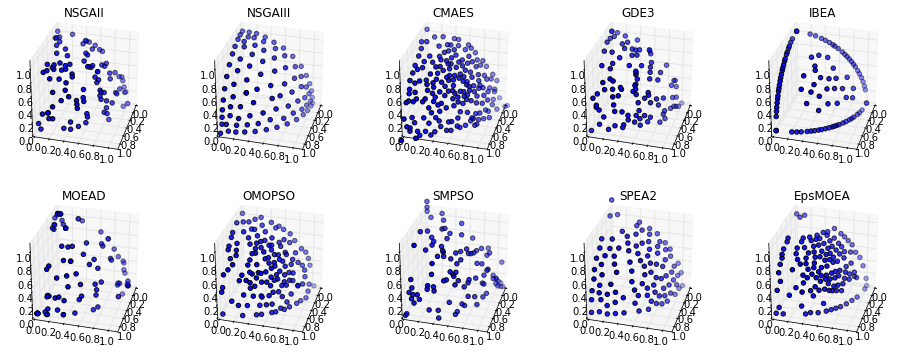

In [9]:
# increase figure size
import pylab
pylab.rcParams['figure.figsize'] = (16.0, 6.0)

# generate the plot
fig = plt.figure()

for i in range(len(algorithms)):
    ax = fig.add_subplot(2, 5, i+1, projection='3d')
    ax.scatter([s.objectives[0] for s in algorithms[i].result],
               [s.objectives[1] for s in algorithms[i].result],
               [s.objectives[2] for s in algorithms[i].result])
    ax.set_xlim([0, 1.1])
    ax.set_ylim([0, 1.1])
    ax.set_zlim([0, 1.1])
    ax.view_init(elev=30.0, azim=15)
    ax.set_title(algorithms[i].__class__.__name__)

plt.show()

As demonstrated, we can quickly solve multiobjective optimization problems and display results.  Platypus is great for education or learning about multiobjective optimization.  If considering Platypus for real applications, please note that its performance is slow.  For applications demanding high performance, check out http://moeaframework.org/.  The MOEA Framework provides a similar architecture to Platypus, but achieves 10-100x better performance.

The latest version of Platypus can be downloaded from https://github.com/Project-Platypus/Platypus.  Platypus is still under active development and new contributors are welcome.